<a href="https://colab.research.google.com/github/jogis0/LLM_Labs/blob/master/LLM_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1

## V1

In [ ]:
!pip install --upgrade pip
!pip install numpy==1.26.4
!pip install protobuf==3.20.3 scikit-learn==1.3.0 pillow==11.1.0 typing-extensions==4.7.1 pydantic==2.9.2
!pip install farm-haystack[colab]==1.17.2
!pip install farm-haystack[sql]
!pip install --only-binary=:all: faiss-cpu
!pip install huggingface-hub==0.25.0
!pip install accelerate==0.31.0
!pip install transformers[torch]==4.29.1

  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
  Using cached pillow-11.1.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached typing_extensions-4.7.1-py3-none-any.whl.metadata (3.1 kB)
  Using cached pydantic-2.9.2-py3-none-any.whl.metadata (149 kB)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
Using cached pillow-11.1.0-cp311-cp311-manylinux_2_28_x86_64.whl (4.5 MB)
Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
Using cached pydantic-2.9.2-py3-none-any.whl (434 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling P

  Using cached protobuf-3.20.2-py2.py3-none-any.whl.metadata (720 bytes)
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached Pillow-9.0.0-cp311-cp311-linux_x86_64.whl
INFO: pip is looking at multiple versions of pydantic to determine which version is compatible with other requirements. This could take a while.
  Using cached pydantic-2.11.4-py3-none-any.whl.metadata (66 kB)
  Using cached pydantic_core-2.33.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached pydantic-2.11.3-py3-none-any.whl.metadata (65 kB)
  Using cached pydantic_core-2.33.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached pydantic-2.11.2-py3-none-any.whl.metadata (64 kB)
  Using cached pydantic-2.11.1-py3-none-any.whl.metadata (63 kB)
  Using cached pydantic_core-2.33.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached pydantic-2.11.0-py3-none-any.whl.meta

In [ ]:
import pandas as pd
from haystack import Document
from haystack.document_stores import FAISSDocumentStore
from haystack.nodes import RAGenerator, DensePassageRetriever
from haystack.pipelines import GenerativeQAPipeline
from haystack.utils import print_answers

In [ ]:
DATASET_DIR = "data/dataset.csv"

In [ ]:
# Create dataframe with columns "title" and "text"
df = pd.read_csv(DATASET_DIR, sep=",")

print(df.head())

# Use data to initialize Document objects
titles = list(df["title"].values)
texts = list(df["text"].values)
documents = []
for title, text in zip(titles, texts):
    documents.append(Document(content=text, meta={"name": title or ""}))

     title                                               text
0  Jupiter  Jupiter, the fifth planet from the Sun, is the...
1  Jupiter  Jupiter's atmosphere is made up mostly of hydr...
2  Jupiter  One of Jupiter's most iconic features is the G...
3  Jupiter  Jupiter has been visited by multiple spacecraf...
4     Mars  Mars, often referred to as the Red Planet, is ...


In [ ]:
document_store = FAISSDocumentStore(faiss_index_factory_str="Flat", return_embedding=True)

retriever = DensePassageRetriever(
    document_store=document_store,
    query_embedding_model="facebook/dpr-question_encoder-single-nq-base",
    passage_embedding_model="facebook/dpr-ctx_encoder-single-nq-base",
    use_gpu=True,
    embed_title=True,
)

generator = RAGenerator(
    model_name_or_path="facebook/rag-token-nq",
    use_gpu=True,
    top_k=1,
    max_length=200,
    min_length=2,
    embed_title=True,
    num_beams=2,
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:90: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/493 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/492 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/bart/configuration_bart.py:179: UserWarning: Please make sure the config includes `forced_bos_token_id=0` in future versions. The config can simply be saved and uploaded again to be fixed.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'DPRQuestionEncoderTokenizerFast'.


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'BartTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RagTokenizer'. 
The class this function is called from is 'BartTokenizerFast'.


pytorch_model.bin:   0%|          | 0.00/2.06G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/rag-token-nq were not used when initializing RagTokenForGeneration: ['rag.question_encoder.question_encoder.bert_model.pooler.dense.bias', 'rag.question_encoder.question_encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing RagTokenForGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RagTokenForGeneration from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Delete existing documents in documents store
document_store.delete_documents()

# Write documents to document store
document_store.write_documents(documents)

# Add documents embeddings to index
document_store.update_embeddings(retriever=retriever)

Writing Documents:   0%|          | 0/15 [00:00<?, ?it/s]

Updating Embedding:   0%|          | 0/15 [00:00<?, ? docs/s]

Create embeddings:   0%|          | 0/16 [00:00<?, ? Docs/s]

In [ ]:
pipeline = GenerativeQAPipeline(generator=generator, retriever=retriever)

QUESTIONS = [
    # Questions for the dataset
    "What is Jupiter primaliry composed of?",
    "What is the Great Red Spot on Jupiter?",
    "How many moons have been discovered around Jupiter?",
    "What is the European Space Agency's future Jupiter mission called?",
    "Has life been found in Mars?",
    "What NASA program has plans for human colonization on Mars?",
    "What is the percentage of nitrogen in the Earth's atmosphere?",
    "What is the center of our solar system?",

    # Questions the dataset does not cover
    "Who is LeBron James?",
    "What is the capital of Italy?",
    "What team won the NBA championship in 1991?",
    "Who is the current president of the Moon?"
]

for question in QUESTIONS:
    result = pipeline.run(query=question, params={"Generator": {"top_k": 1}, "Retriever": {"top_k": 5}})
    print_answers(result, details="minimum")

'Query: What is Jupiter primaliry composed of?'
'Answers:'
[{'answer': ' hydrogen and helium'}]
'Query: What is the Great Red Spot on Jupiter?'
'Answers:'
[{'answer': ' a massive storm'}]
'Query: How many moons have been discovered around Jupiter?'
'Answers:'
[{'answer': ' 79'}]
"Query: What is the European Space Agency's future Jupiter mission called?"
'Answers:'
[{'answer': ' jupiter icy moons explorer'}]
'Query: Has life been found in Mars?'
'Answers:'
[{'answer': ' no definitive signs of life'}]
'Query: What NASA program has plans for human colonization on Mars?'
'Answers:'
[{'answer': ' artemis program'}]
"Query: What is the percentage of nitrogen in the Earth's atmosphere?"
'Answers:'
[{'answer': ' 78 %'}]
'Query: What is the center of our solar system?'
'Answers:'
[{'answer': ' the sun'}]
'Query: Who is LeBron James?'
'Answers:'
[{'answer': ' lebron james'}]
'Query: What is the capital of Italy?'
'Answers:'
[{'answer': ' madrid'}]
'Query: What team won the NBA championship in 19

## V2

In [ ]:
# https://www.youtube.com/watch?v=SxAwyeCkguc&t=418s
!pip install haystack-ai sentence-transformers transformers "huggingface_hub>=0.22.0"
!pip install google-ai-haystack

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.0/494.0 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import pandas as pd
from haystack import Pipeline
from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.components.embedders import SentenceTransformersDocumentEmbedder
from haystack.components.writers import DocumentWriter
from haystack.dataclasses import Document
from haystack.components.embedders import SentenceTransformersTextEmbedder
from haystack.components.builders import PromptBuilder
from haystack_integrations.components.generators.google_ai import GoogleAIGeminiGenerator
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever

In [ ]:
if "HF_TOKEN" not in os.environ:
    os.environ["HF_TOKEN"] = "..."

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = "..."

DATASET_DIR = "data/dataset.csv"

In [ ]:
# Create dataframe with columns "title" and "text"
df = pd.read_csv(DATASET_DIR, sep=",")

print(df.head())

# Use data to initialize Document objects
titles = list(df["title"].values)
texts = list(df["text"].values)
documents = []
for title, text in zip(titles, texts):
    documents.append(Document(content=text, meta={"name": title or ""}))

     title                                               text
0  Jupiter  Jupiter, the fifth planet from the Sun, is the...
1  Jupiter  Jupiter's atmosphere is made up mostly of hydr...
2  Jupiter  One of Jupiter's most iconic features is the G...
3  Jupiter  Jupiter has been visited by multiple spacecraf...
4     Mars  Mars, often referred to as the Red Planet, is ...


In [ ]:
pipeline = Pipeline()
document_store = InMemoryDocumentStore()

pipeline.add_component("embedder", SentenceTransformersDocumentEmbedder())
pipeline.add_component("writer", DocumentWriter(document_store))
pipeline.connect("embedder", "writer")

pipeline.run({"embedder":{"documents": documents}})

# Print out documents
# document_store.filter_documents()

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[Document(id=7de1835ed5d2c80d3de5ed69eaef37c987a80ca61cf7a14e9ffec31bb5688c65, content: 'Jupiter, the fifth planet from the Sun, is the largest planet in our solar system. It is a gas giant...', meta: {'name': 'Jupiter'}, embedding: vector of size 768),
 Document(id=d32d35a40becc3dc71be6529bdeeafcfdf3074f88d2c1842325e1a45c03537ea, content: 'Jupiter's atmosphere is made up mostly of hydrogen (around 90%) and helium (about 10%), with trace a...', meta: {'name': 'Jupiter'}, embedding: vector of size 768),
 Document(id=e9680571f1e6e2442f9be4482b4a64cde4b37bbf9b35861c1cebe6a63ffe3b64, content: 'One of Jupiter's most iconic features is the Great Red Spot, a massive storm that has raged for at l...', meta: {'name': 'Jupiter'}, embedding: vector of size 768),
 Document(id=c23465b3d1e34c3be294d890dc34d3a98b6888269a0729dbe60021ddaa3c6fb9, content: 'Jupiter has been visited by multiple spacecraft, including Pioneer, Voyager, Galileo, and Juno. Thes...', meta: {'name': 'Jupiter'}, embedding: vecto

In [ ]:
embedder = SentenceTransformersTextEmbedder()

retriever = InMemoryEmbeddingRetriever(document_store=document_store)

template = """Given the following context, answer the question.
              Context:
              {%for document in documents %}
                {{ document.content }}
              {% endfor %}
              Question: {{query}}
           """
prompt_builder = PromptBuilder(template=template)

generator = GoogleAIGeminiGenerator(model="gemini-2.0-flash")

In [ ]:
rag_pipeline = Pipeline()
rag_pipeline.add_component("embedder", embedder)
rag_pipeline.add_component("retriever", retriever)
rag_pipeline.add_component("prompt_builder", prompt_builder)
rag_pipeline.add_component("generator", generator)

rag_pipeline.connect("embedder", "retriever")
rag_pipeline.connect("retriever.documents", "prompt_builder.documents")
rag_pipeline.connect("prompt_builder", "generator")

🚅 Components
  - embedder: SentenceTransformersTextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - generator: GoogleAIGeminiGenerator
🛤️ Connections
  - embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> generator.parts (str)

In [ ]:
QUESTIONS = [
    # Questions for dataset
    "What is Jupiter primaliry composed of?",
    "What is the Great Red Spot on Jupiter?",
    "How many moons have been discovered around Jupiter?",
    "What is the European Space Agency's future Jupiter mission called?",
    "Has life been found in Mars?",
    "What NASA program has plans for human colonization on Mars?",
    "What is the percentage of nitrogen in the Earth's atmosphere?",
    "What is the center of our solar system?",

    # Questions not cover by dataset
    "Who is LeBron James?",
    "What is the capital of Italy?",
    "What team won the NBA championship in 1991?",
    "Who is the current president of the Moon?"
]

for question in QUESTIONS:
    response = rag_pipeline.run({"embedder": {"text": question},
                  "prompt_builder": {"query": question}})
    answer = response["generator"]["replies"][0]
    print(f"Question: \n{question}\nAnswer: \n{answer}")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
What is Jupiter primaliry composed of?
Answer: 
Jupiter is primarily composed of hydrogen and helium.



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
What is the Great Red Spot on Jupiter?
Answer: 
The Great Red Spot on Jupiter is a massive storm that has raged for at least 400 years. It is so large that three Earths could fit within its boundaries.



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
How many moons have been discovered around Jupiter?
Answer: 
79



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
What is the European Space Agency's future Jupiter mission called?
Answer: 
The European Space Agency's future Jupiter mission is called Jupiter Icy Moons Explorer (JUICE).



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
Has life been found in Mars?
Answer: 
No definitive signs of life have been found on Mars.



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
What NASA program has plans for human colonization on Mars?
Answer: 
The provided text states that NASA's Artemis program aims to bring humans to Mars.



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
What is the percentage of nitrogen in the Earth's atmosphere?
Answer: 
According to the context, Earth's atmosphere is a delicate mix of 78% nitrogen.



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
What is the center of our solar system?
Answer: 
The Sun is the center of our solar system.



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
Who is LeBron James?
Answer: 
This document does not contain any information about LeBron James.



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
What is the capital of Italy?
Answer: 
The provided text is about planets in our solar system and the Sun. It does not contain information about the capital of Italy. Therefore, I cannot answer the question based on the context.



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
What team won the NBA championship in 1991?
Answer: 
This question cannot be answered from the context provided. The context is about space and planets, not basketball.



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Question: 
Who is the current president of the Moon?
Answer: 
The text does not mention a president of the Moon.



# 4.2

In [1]:
!pip install transformers
!pip install torch
!pip install torchvision
!pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [16]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
from io import BytesIO
import os
from os.path import join

In [25]:
IMAGE_PATHS = [f for f in os.listdir("images")]

In [23]:
def generate_image_description(image_path, model):
    processor = BlipProcessor.from_pretrained(model)
    model = BlipForConditionalGeneration.from_pretrained(model)

    img = Image.open(join("images", image_path)).convert('RGB')
    img = img.resize((640, 360))

    display(img)

    inputs = processor(images=img, return_tensors="pt")

    out = model.generate(**inputs)
    description = processor.decode(out[0], skip_special_tokens=True)

    return description

def test_model(model):
  for image_path in IMAGE_PATHS:
    description = generate_image_description(image_path, model)
    print("Generated Description:")
    print(description)

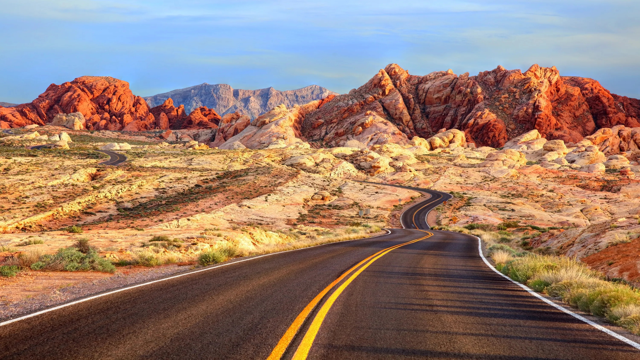

Generated Description:
a road in the desert with mountains in the background


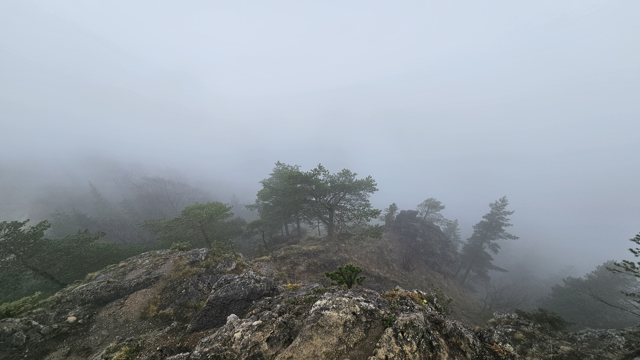

Generated Description:
a mountain with a few trees on it


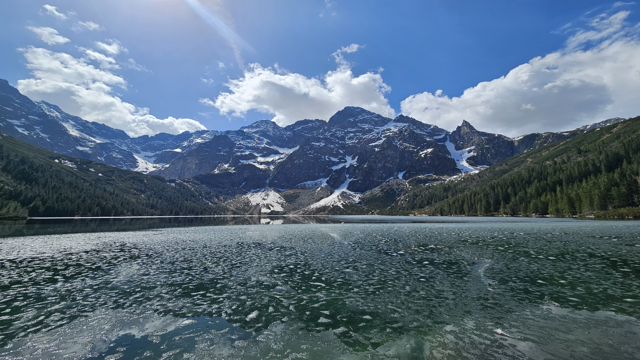

Generated Description:
a mountain range in the distance


Generated Description:
a turtle swimming in the ocean with many colorful fish


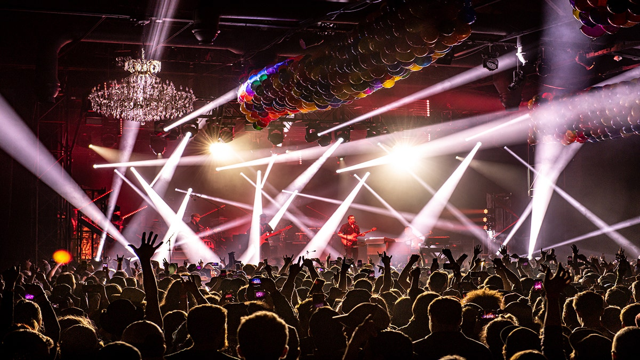

Generated Description:
a crowd of people at a concert


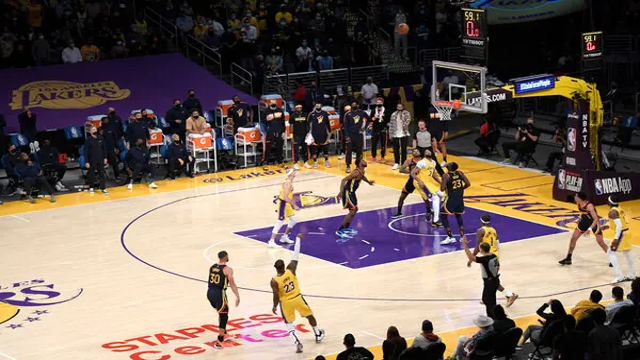

Generated Description:
lakers game highlights


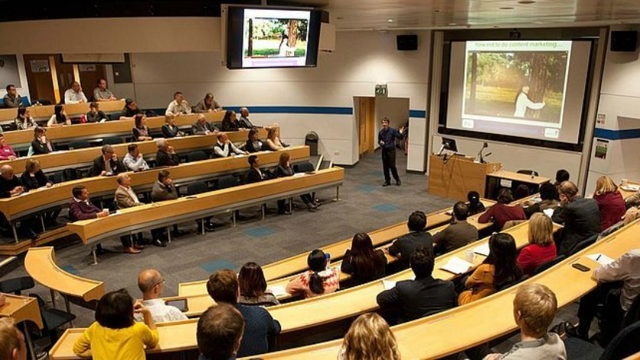

Generated Description:
a lecture room filled with people sitting at tables


Generated Description:
a blue car parked on a street next to a curb


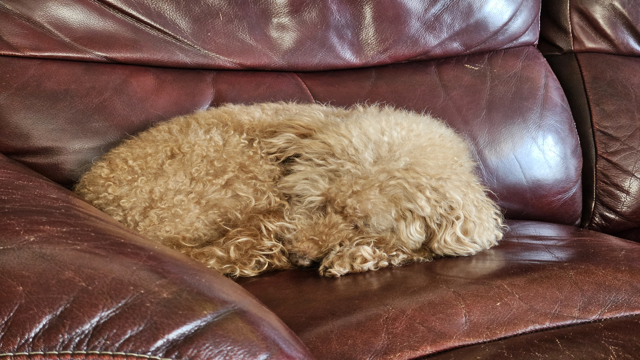

Generated Description:
a dog sleeping on a leather couch


Generated Description:
a yellow corvette racing car


In [24]:
test_model("Salesforce/blip-image-captioning-base")
test_model("Salesforce/blip-image-captioning-large")
test_model("noamrot/FuseCap_Image_Captioning")